In [1]:
from scipy.optimize import curve_fit,minimize
from analysis.import_data import import_data,filter_data,combine_columns
from analysis.plot_matplotlib import plot_hist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_root = "/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison"

In [3]:
mcp_raw = import_data(data_root + "/npy/mcparticle/compare_mcparticle.npy")
reco_raw = import_data(data_root + "/npy/reco/compare_reco.npy")
tjmr_raw = import_data(data_root + "/npy/truejet_matchingreco/compare_truejet_matchingreco.npy")
tjt_raw = import_data(data_root + "/npy/truejet_true/compare_truejet_true.npy")
tjs_raw = import_data(data_root + "/npy/truejet_seen/compare_truejet_seen.npy")

In [4]:
data = {
    "mcp": filter_data(mcp_raw),
    "reco": filter_data(reco_raw),
    "tjmr": filter_data(tjmr_raw),
    "tjt": filter_data(tjt_raw),
    "tjs": filter_data(tjs_raw)
}

In [5]:
data["reco"]["misclustering_region"]

0        0
1        5
2        1
3        5
4        0
        ..
29244    0
29245    6
29246    1
29247    0
29248    6
Name: misclustering_region, Length: 29249, dtype: int32

In [5]:
data["reco"].shape

(29249, 76)

In [8]:
# Transfer function analysis
key = "reco"
data[key] = data[key][((data[key]["parton1_e"] > 0) & (data[key]["parton2_e"] > 0) & (data[key]["parton3_e"] > 0) & (data[key]["parton4_e"] > 0) )]

In [27]:
data["reco"].shape

(7764, 76)

In [28]:
data[key] = data[key][((data[key]["jet1_e"] > 0) & (data[key]["jet2_e"] > 0) & (data[key]["jet3_e"] > 0) & (data[key]["jet4_e"] > 0))]

In [29]:
data["reco"].shape

(18, 76)

In [5]:
i = 1
reco = data["reco"][((data["reco"]["jet{}_e".format(i)] > 0) & (data["key"]["parton{}_e".format(i)] > 0))]

KeyError: 'key'

<Axes: xlabel='parton1_e', ylabel='Count'>

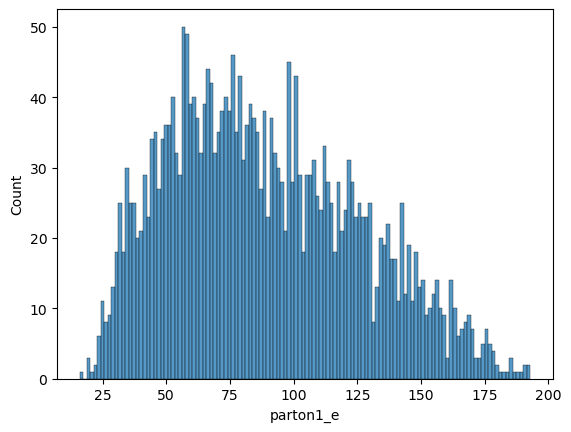

In [86]:
sns.histplot(reco, x="parton{}_e".format(i), bins=128)

In [55]:
reco = data["reco"]

In [403]:

def plot_hist(data, x:Union[str,list], fit_func: None, fit_opts:Optional[dict] = None, labels=None, colorpalette=None, bins=128, xlim_binning=False, xlim:Optional[tuple] = None, ylim=None, xlabel:Optional[str] = None, ylabel:Optional[str]=None, units="", normalize=False, title:Optional[str] = "Likelihood-Analysis", ax=None, text_start_x=0.965, text_start_y=0.98, xscale = "linear", yscale = "linear", fontsize:Optional[str] = None):
    """_summary_

    Args:
        data (_type_): _description_
        x (Union[str,list]): _description_
        fit_func (Optional[function], optional): only supported if one column is to be plotted, i.e. x is a string
        fit_opts (Optional[dict], opional): only used for printing
        labels (_type_, optional): _description_. Defaults to None.
        colorpalette (_type_, optional): _description_. Defaults to None.
        bins (int, optional): _description_. Defaults to 128.
        xlim_binning (bool, optional): _description_. Defaults to False.
        xlim (Optional[tuple], optional): _description_. Defaults to None.
        ylim (_type_, optional): _description_. Defaults to None.
        xlabel (Optional[str], optional): _description_. Defaults to None.
        ylabel (Optional[str], optional): _description_. Defaults to None.
        units (str, optional): _description_. Defaults to "".
        normalize (bool, optional): _description_. Defaults to False.
        title (Optional[str], optional): _description_. Defaults to "Likelihood-Analysis".
        ax (_type_, optional): _description_. Defaults to None.
        text_start_x (float, optional): _description_. Defaults to 1.02.
        text_start_y (float, optional): _description_. Defaults to 1.05.
        xscale (str, optional): _description_. Defaults to "linear".
        yscale (str, optional): _description_. Defaults to "linear".
        fontsize (Optional[str], optional): _description_. Defaults to None.
    """
    
    if ax == None:
        fig, ax = plt.subplots()
        fig.set_dpi(100)
        fig.set_figwidth(8)
        
        fig.set_figheight(6)
    else:
        fig = plt.gcf()
        
    # Set font size
    if fontsize is not None:
        pylab.rcParams.update(params = {
            'legend.fontsize': fontsize,
            'figure.figsize': (15, 5),
            'axes.labelsize': fontsize,
            'axes.titlesize': fontsize,
            'xtick.labelsize': fontsize,
            'ytick.labelsize': fontsize})
    
    if colorpalette is None:
        #colorpalette = ["tab:blue", "tab:red", "y", "tab:pink", "tab:cyan", "tab:olive"]
        prop_cycle = plt.rcParams['axes.prop_cycle']
        colorpalette = prop_cycle.by_key()['color']
    
    # If data is one-dimensional, only plot this
    xlim_view = ()
    
    if len(list(data.shape)) == 1:
        columns = [None] # In this case, data is assumed to contain just one column of data, which is to be histogrammed
        xlim_view = (0.98*data.min(), 1.02*data.max()) if xlim is None else xlim
    else:
        columns = x
        xlim_view = (0.98*data[x].min().min(), 1.02*data[x].max().max()) if xlim is None else xlim

    for i in range(len(columns)):
        column = columns[i]
        values = data if column is None else data[column]
            
        # Limits
        min_val = xlim[0] if (xlim is not None and xlim_binning) else np.min(values)
        max_val = xlim[1] if (xlim is not None and xlim_binning) else np.max(values)
        
        bin_edges = np.linspace(min_val, max_val, bins + 1)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
            
        # Additional behavior if only one column is to be plotted
        h_name  = (x if isinstance(x, str) else "Some Plot") if column is None else (column if labels is None else labels[i])
        
        bin_counts, _, patches = (plt if ax == None else ax).hist(values, bin_edges,
                 alpha=0.7,
                 label=h_name,
                 linestyle="solid",
                 linewidth=1.5,
                 hatch="///",
                 color="w",
                 histtype="step",
                 ec=colorpalette[i],
                 weights=np.ones_like(values)/(len(values) if normalize else 1))
        
        if isinstance(x, str):
            if callable(fit_func):
                fit_data = fit_func(bin_centers)
                
                if normalize:
                    fit_data = fit_data/fit_data.sum()
                    
                MSE = ((bin_counts - fit_data)**2).sum()*1/(len(bin_counts))
                RMSE = sqrt(MSE)
                
                ss_res = ((bin_counts - fit_data) ** 2).sum()
                ss_tot = (((bin_counts - np.mean(bin_counts)) ** 2)).sum()
                print(ss_res, ss_tot)
                COE = 1 - (ss_res / ss_tot) # R^2
                
                (plt if ax == None else ax).plot(bin_centers, fit_data, color="red")
                fig.text(text_start_x, text_start_y - 0.11,
                 f"Fit{fit_func.__name__ if not fit_func.__name__ == '<lambda>' else ''}\nMSE: {format_st(MSE)}\nRMSE: {format_st(RMSE)}\nR^2: {COE:.2f}" , # + ("" if not isinstance(fit_opts, dict) else "\n".join("{0}:{1:.2f}".format(key, fit_opts[key]) for key in fit_opts.keys()))
                 #color=colorpalette[i],
                 bbox=dict(edgecolor="red", facecolor="w"),
                 fontsize='medium' if fontsize is None else fontsize,
                 horizontalalignment='right',
                 verticalalignment='top',
                 transform=ax.transAxes)
        
        fig.text(text_start_x, text_start_y - 0.11*i,
                 ("" if column is None else f"{h_name}\n") + "Entries: {0}\nMean: {1:.2f}\nStd Dev: {2:.2f}".format(len(values), np.average(values), np.std(values)),
                 #color=colorpalette[i],
                 bbox=dict(edgecolor=colorpalette[i], facecolor="w"),
                 fontsize='medium' if fontsize is None else fontsize,
                 horizontalalignment='right',
                 verticalalignment='top',
                 transform=ax.transAxes)
    
    #plt_obj.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
    
    if ax == None: 
        if title is not None:
            plt.title(title)
            
        if xlabel is not None:
            plt.xlabel(xlabel)#, fontsize=fontsize)
            
        if ylabel is not None:
            plt.ylabel(ylabel)#, fontsize=fontsize)
            
        plt.xscale(xscale)
        plt.yscale(yscale)
                    
        plt.xlim(xlim_view)
        plt.show()
        
        if ylim is not None:
            ax.ylim(ylim)
    else:
        if title is not None:
            ax.set_title(title)
            
        ax.set_xlim(xlim_view)
        ax.set_xscale(xscale)
        ax.set_yscale(yscale)
        
        if xlabel is not None:
            ax.set_xlabel(xlabel)#, fontsize=fontsize)
            
        if ylabel is not None:
            ax.set_ylabel(ylabel)#, fontsize=fontsize)
        
        if ylim is not None:
            ax.set_ylim(ylim)

In [406]:
def plot_energy_transfer(data, name, plot_save_dir:Optional[str] = None, fit = "gauss", true_label = "parton", reco_label = "jet"):
    from scipy.optimize import curve_fit
    
    fig, axes = plt.subplots(1, len(data), figsize=(6*len(data),8))
    fig.suptitle(name + r": $E_{" + reco_label + r"}-E_{" + true_label + r"}$", fontsize=18)
    
    for i in range(1,1+len(data)):
        n_bins = 128
        df = data[i-1]
        
        y, bins = np.histogram(df, bins=n_bins)
        x = (bins[:-1] + bins[1:]) / 2
        
        def bw(x, N, x0, G, c):
            return N*G/((2*pi)*((x-x0)**2 + ((G**2)/4)))+c
        
        def gauss(x, a, x0, sigma, c):
            return a*np.exp(-(x-x0)**2/(2*sigma**2))+c
        
        fit_func = bw if fit == "bw" else gauss
        
        init_bw = [len(df), np.average(df), 1, 0]
        init_gauss = [len(df), np.average(df), np.std(df), 0]
        
        popt, pcov = curve_fit(fit_func, x, y, p0 = (init_bw if fit_func == bw else init_gauss))

        plot_hist(df, f"{reco_label.title()} {i}", fit_func=lambda x: fit_func(x, *popt), fit_opts=popt, bins=n_bins, xlim=(-100,100), ax=axes[i-1], xlabel=r"$ΔE$ [GeV]", title=f"{reco_label.title()} {i}", normalize=True, yscale="linear")
        #sns.histplot(data["jet{}_e".format(i)] - data["parton{}_e".format(i)], bins=128, ax=axes[i-1]).set_title("Jet {}".format(i))
        
    if plot_save_dir is not None:
        plot_path = osp.join(plot_save_dir, f"{name}.png")
        if osp.isfile(plot_path):
            remove(plot_path)
        
        fig.savefig(plot_path)
    else:
        plt.show()
        
    plt.close(fig)

def plot_jet_energy_transfer_from_df(data, name = "", plot_save_dir:Optional[str] = None, fit = "gauss"):
    df = []
    for i in range(1, 5):
        df.append(data["jet{}_e".format(i)] - data["parton{}_e".format(i)])
    
    plot_energy_transfer(df , name, plot_save_dir=plot_save_dir, fit=fit)
    
def plot_lep_energy_transfer_from_df(data, name = "", plot_save_dir:Optional[str] = None, fit = "gauss"):
    df = []
    for i in range(1, 3):
        df.append(data["lep{}_e".format(i)] - data["true_lep{}_e".format(i)])
    
    plot_energy_transfer(df , name, plot_save_dir=plot_save_dir, fit=fit, true_label="MuonTruth", reco_label="Muon")

0.0017404045438085083 0.14503334964459103
0.0015141973906190199 0.14180514018967547


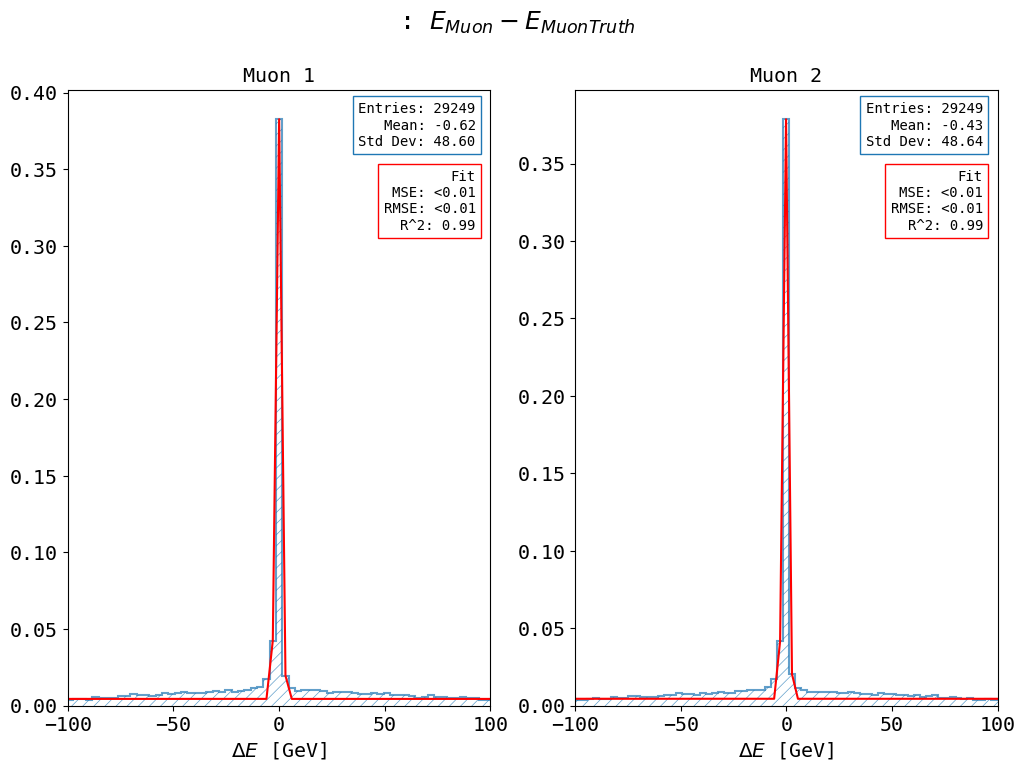

In [407]:
plot_lep_energy_transfer_from_df(reco)

In [410]:
reco.keys()

Index(['run', 'event', 'error_code', 'is_zhh', 'is_zzh', 'passed_preselection',
       'true_h1_decay_pdg', 'true_h2_decay_pdg', 'true_z2_decay_pdg',
       'misclustering_region', 'misclustering_region_icns', 'efrac1_reco',
       'efrac2_reco', 'efrac1_true', 'efrac2_true', 'efrac1_icn_reco',
       'efrac2_icn_reco', 'efrac1_icn_true', 'efrac2_icn_true', 'parton1_e',
       'parton2_e', 'parton3_e', 'parton4_e', 'parton1_pdg', 'parton2_pdg',
       'parton3_pdg', 'parton4_pdg', 'true_lep1_e', 'true_lep2_e', 'jet1_e',
       'jet2_e', 'jet3_e', 'jet4_e', 'lep1_e', 'lep2_e', 'h1_decay_pdg',
       'h2_decay_pdg', 'z2_decay_pdg', 'zhh_sigma', 'zhh_sigmall',
       'zhh_sigmalr', 'zhh_sigmarl', 'zhh_sigmarr', 'zhh_mz', 'zhh_mhh',
       'zhh_mzhh', 'zhh_phi', 'zhh_phif', 'zhh_phih', 'zhh_costheta',
       'zhh_costhetaf', 'zhh_costhetah', 'zzh_sigma', 'zzh_sigmalll',
       'zzh_sigmallr', 'zzh_sigmalrl', 'zzh_sigmalrr', 'zzh_sigmarrr',
       'zzh_sigmarrl', 'zzh_sigmarlr', 'zzh_sigmar

0.0013595302499449355 0.14503334964459103
0.0011547492841830018 0.14180514018967547


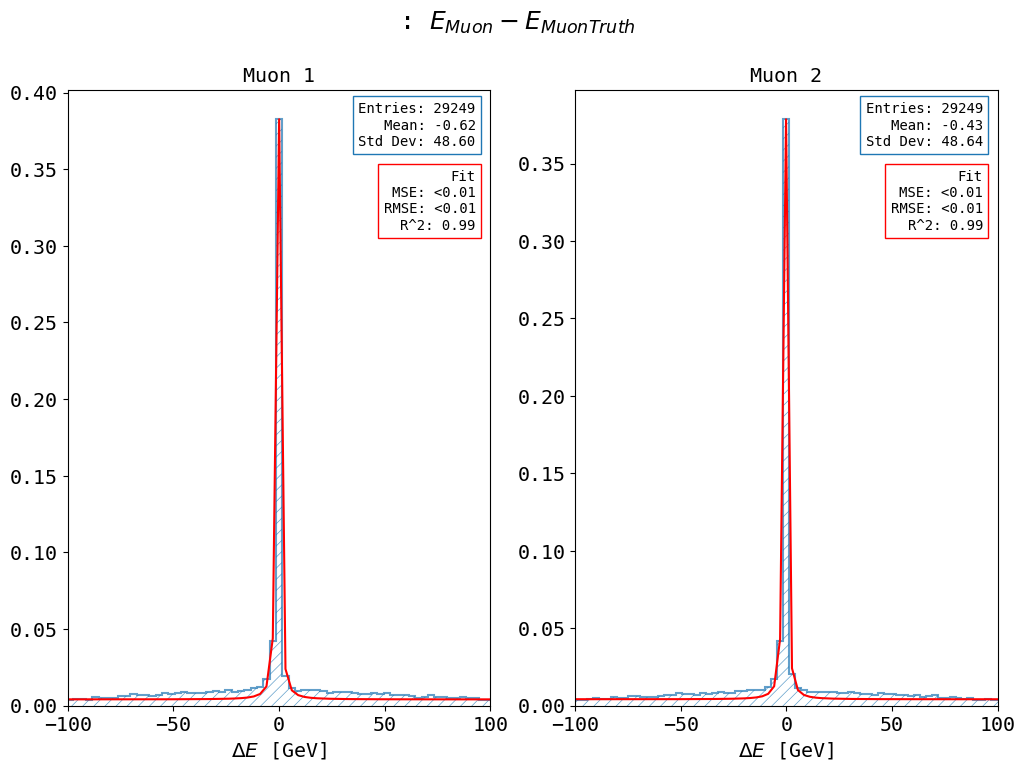

In [408]:
plot_lep_energy_transfer_from_df([
    data["lep{}_e".format(i)]
])

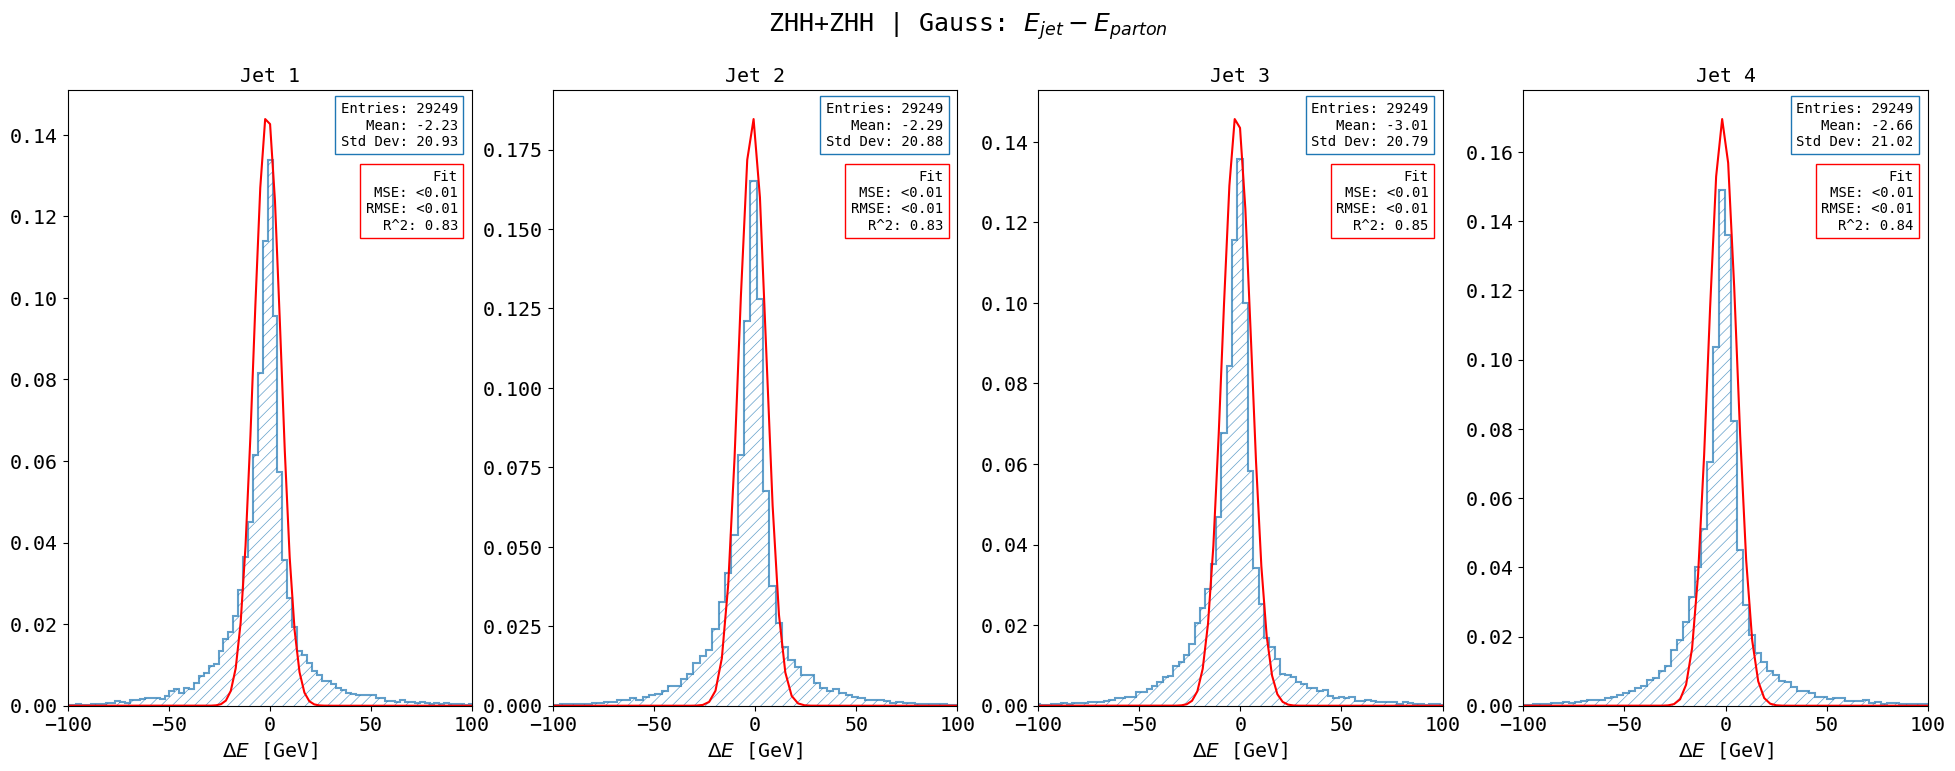

In [394]:
#from analysis.energy_transfer import plot_jet_energy_transfer_from_df
plot_jet_energy_transfer_from_df(reco, "ZHH+ZHH | Gauss", fit = "gauss")

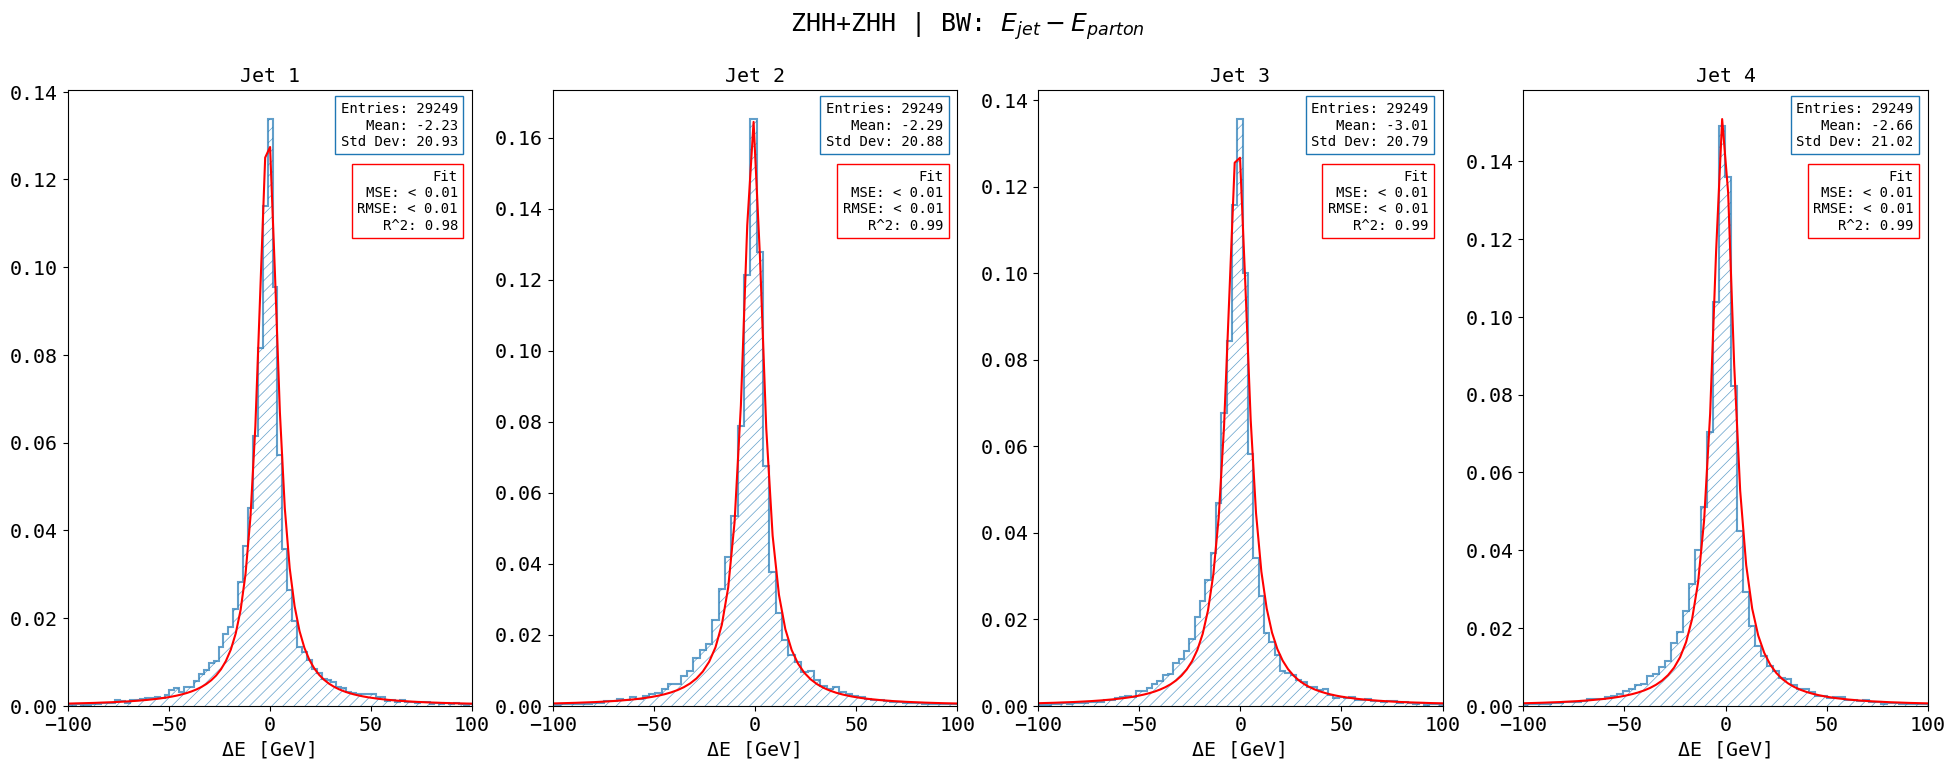

In [376]:
plot_jet_energy_transfer_from_df(reco, "ZHH+ZHH | BW", fit = "bw")

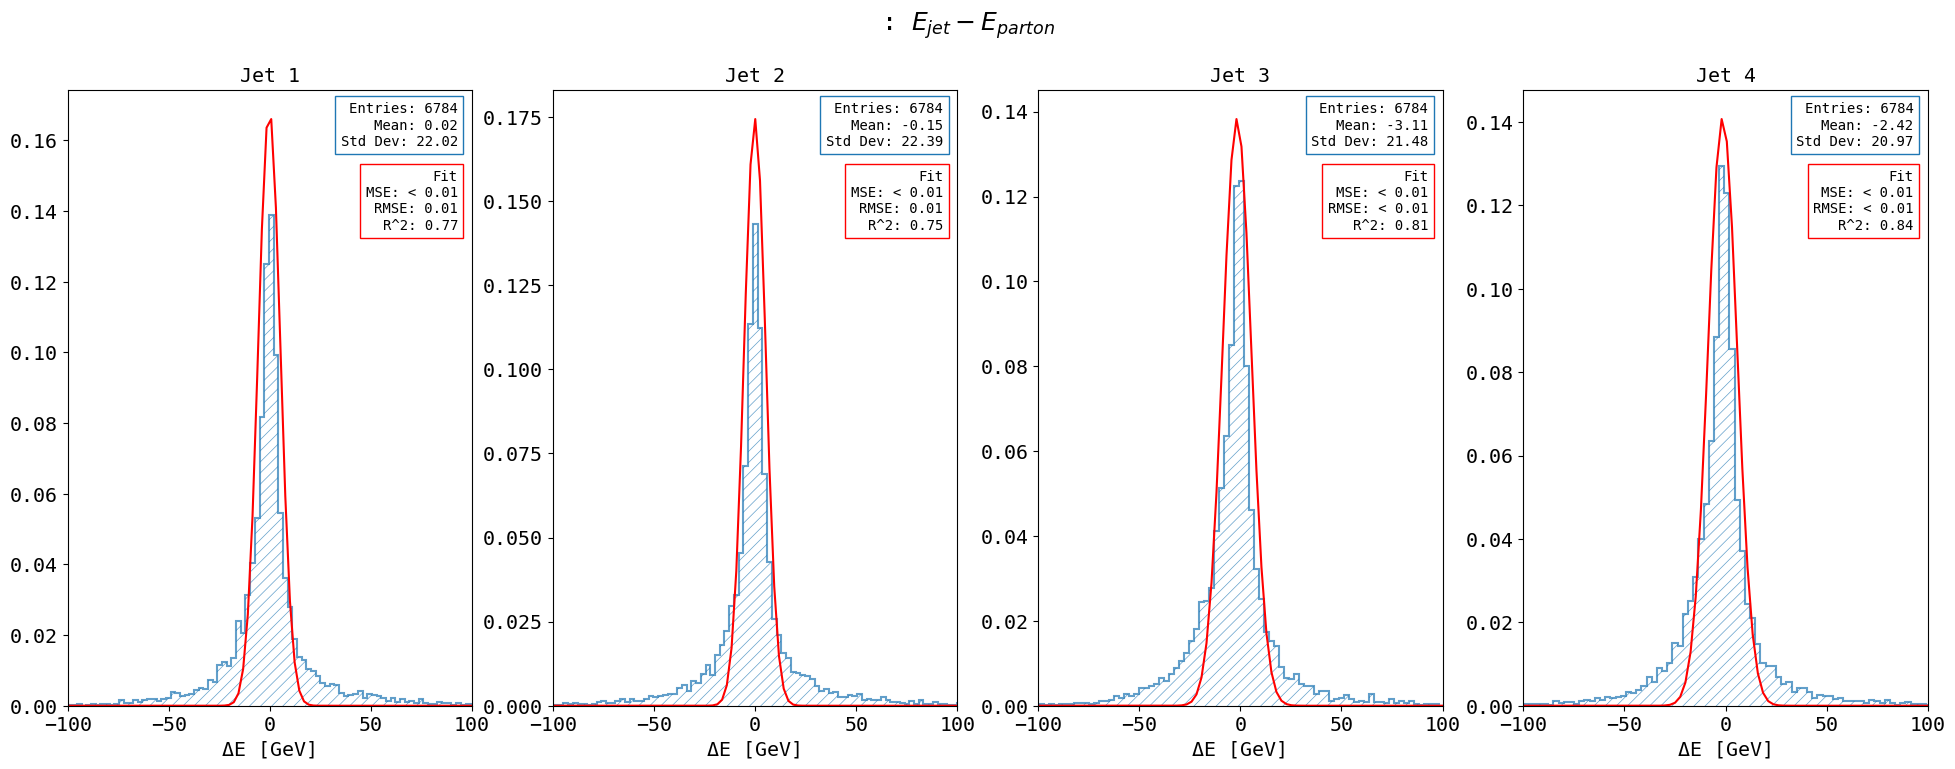

In [377]:
plot_jet_energy_transfer_from_df(reco[reco['is_zzh'] == 1])

In [378]:
true_lep1_e, lep1_e

Index(['run', 'event', 'error_code', 'is_zhh', 'is_zzh', 'passed_preselection',
       'true_h1_decay_pdg', 'true_h2_decay_pdg', 'true_z2_decay_pdg',
       'misclustering_region', 'misclustering_region_icns', 'efrac1_reco',
       'efrac2_reco', 'efrac1_true', 'efrac2_true', 'efrac1_icn_reco',
       'efrac2_icn_reco', 'efrac1_icn_true', 'efrac2_icn_true', 'parton1_e',
       'parton2_e', 'parton3_e', 'parton4_e', 'parton1_pdg', 'parton2_pdg',
       'parton3_pdg', 'parton4_pdg', 'true_lep1_e', 'true_lep2_e', 'jet1_e',
       'jet2_e', 'jet3_e', 'jet4_e', 'lep1_e', 'lep2_e', 'h1_decay_pdg',
       'h2_decay_pdg', 'z2_decay_pdg', 'zhh_sigma', 'zhh_sigmall',
       'zhh_sigmalr', 'zhh_sigmarl', 'zhh_sigmarr', 'zhh_mz', 'zhh_mhh',
       'zhh_mzhh', 'zhh_phi', 'zhh_phif', 'zhh_phih', 'zhh_costheta',
       'zhh_costhetaf', 'zhh_costhetah', 'zzh_sigma', 'zzh_sigmalll',
       'zzh_sigmallr', 'zzh_sigmalrl', 'zzh_sigmalrr', 'zzh_sigmarrr',
       'zzh_sigmarrl', 'zzh_sigmarlr', 'zzh_sigmar

In [9]:
from analysis.dtf_dbgauss import dbgauss, dbgauss_wrapped

def wrapper_fit_func(x, N, *args):
    a, b, c = list(args[0][:N]), list(args[0][N:2*N]), list(args[0][2*N:3*N])
    return fit_func(x, a, b, c, N)

In [10]:
res = dbgauss_wrapped((E_j, E_p), 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 1)
-np.log(res).sum()

NameError: name 'E_j' is not defined

In [384]:
initial_guess = [1, 1, 1, 1,  1, 1, 1, 1, 1]

In [385]:
f([0, 0, 1, 1,       1, 1, 1, 1, 1])

16227.839

In [471]:
np.random.rand(3)

array([0.43808949, 0.92400248, 0.39735983])

In [480]:
a = (1,2,3,4)
b = (1,2,3,4,5)
c = (1,2,3,4,1,2,3,4,5)
dbgauss_wrapped((1, 2), *c)

0.021969101319215076

In [11]:
def make_guess():
    rand = -1+2*np.random.rand(9)
    return [rand[0]*9, rand[1]*9, rand[2], rand[3]*3,   rand[4], rand[5], rand[6], rand[7], rand[8]]

def fit_jet(data, i, guess=None):
    reco = data["reco"][((data["reco"]["jet{}_e".format(i)] > 0) & (data["reco"]["parton{}_e".format(i)] > 0))]
    
    E_j = reco["jet{}_e".format(i)]; E_j.reset_index(drop=True, inplace=True)
    E_p = reco["parton{}_e".format(i)]; E_p.reset_index(drop=True, inplace=True)
    
    def f(args):
        a = [args[0], args[1], 0, args[2], args[3]] 
        b = args[4:9]
        #JES = args[10]
        JES = 1
        
        return -np.log(dbgauss(a, b, E_j, E_p, JES)).sum()    
    
    lowest = 9999
    n_iter = 1 if guess is not None else 100
    result = None
    for j in range(n_iter):
        c_result = minimize(f, x0=(guess if guess is not None else make_guess()), method='Nelder-Mead', options={'maxiter': 1e4, 'maxfev': 1e4, 'disp': True})
        if c_result.fun < lowest and c_result.fun > 0.1:
            result = c_result
            lowest = c_result.fun
    
    h, xedges, yedges, _ = plt.hist2d(E_j, E_p, bins=(32,32))

    #bins_j = np.histogram_bin_edges(E_j, bins=32)
    bincs_j = xedges[:-1] + np.diff(xedges) / 2

    #bins_p = np.histogram_bin_edges(E_p, bins=32)
    bincs_p = yedges[:-1] + np.diff(yedges) / 2
    
    plt.close()
    
    # Plot data
    plt.imshow(h/h.sum().sum(), origin="lower", extent=(E_j.min(), E_j.max(), E_p.min(), E_p.max()))
    plt.colorbar()
    plt.suptitle("Data")
    plt.show()
    
    Z = []
    for E in bincs_p:
        Z.append(dbgauss_wrapped((bincs_j, E*np.ones(len(bincs_j)), ), *result.x))
    Z = np.array(Z)
    
    # Plot fit
    plt.imshow(Z/Z.sum().sum(), origin="lower", extent=(bincs_j.min(), bincs_j.max(), bincs_p.min(), bincs_p.max()))
    plt.colorbar()
    plt.suptitle("Fit")
    plt.show()
    
    # Plot comparison
    plt.imshow(np.abs(Z/Z.sum().sum()-h/h.sum().sum()), origin="lower", extent=(bincs_j.min(), bincs_j.max(), bincs_p.min(), bincs_p.max()))
    plt.colorbar()
    plt.suptitle("Diff")
    plt.show()
    
    return result

def fit_jet_binned(reco_total, i_jet, n_iters = 3):
    
    # Get data
    reco = reco_total[((reco_total[f"jet{i_jet}_e"] > 0) & (reco_total[f"parton{i_jet}_e"] > 0))]
    
    initial_guess = [-5.08e-0, 3.8e0, 2.23e-4, 1.12e1,    2.4e-3, 8.7e-2, 2.12e-3, -1.81e-1, 1.12e-1]
    
    E_j = reco[f"jet{i_jet}_e"].copy(); E_j.reset_index(drop=True, inplace=True)
    E_p = reco[f"parton{i_jet}_e"].copy(); E_p.reset_index(drop=True, inplace=True)
    
    # Create hist    
    h, xedges, yedges, _ = plt.hist2d(E_j, E_p, bins=(32,32))
    bincs_j = (xedges[:-1] + xedges[1:]) / 2
    bincs_p = (yedges[:-1] + yedges[1:]) / 2
    
    plt.close()
    
    # Normalize bins
    h = h/h.sum().sum()
    
    def f_binned(args):
        a = [args[0], args[1], 0, args[2], args[3]] 
        b = args[4:9]
        #JES = args[10]
        JES = 1
        
        # Predict data at bin centers
        Z = []
        for E in bincs_p:
            Z.append(dbgauss(a, b, bincs_j, E*np.ones(len(bincs_j)), JES))
        Z = np.array(Z)
        Z = Z/Z.sum().sum()
        
        return (((Z-h)**2).sum().sum())
        
        #return -np.log(dbgauss(a, b, E_j, E_p, JES)).sum()
        
    
    lowest = 9999
    n_iter = 50
    result = None
    for j in range(3):
        c_result = minimize(f_binned, x0=make_guess(), method='Nelder-Mead', options={'maxiter': 1e4, 'maxfev': 1e4, 'disp': True})

        if c_result.fun < lowest and c_result.fun > 0.0001:
            result = c_result
            lowest = c_result.fun
    
    # Plot data
    plt.imshow(h, origin="lower", extent=(E_j.min(), E_j.max(), E_p.min(), E_p.max()))
    plt.tight_layout()
    plt.xlabel(r"$E_{jet}$ [GeV]")
    plt.ylabel(r"$E_{parton}$ [GeV]")
    plt.colorbar()
    plt.suptitle(f"Jet {i_jet} Data")
    plt.show()
    
    Z = []
    for E in bincs_p:
        Z.append(dbgauss_wrapped((bincs_j, E*np.ones(len(bincs_j)), ), *result.x))
    Z = np.array(Z)
    
    # H: data
    # Z: fit
    
    # Plot fit
    plt.imshow(Z/Z.sum().sum(), origin="lower", extent=(bincs_j.min(), bincs_j.max(), bincs_p.min(), bincs_p.max()))
    plt.tight_layout()
    plt.xlabel(r"$E_{jet}$ [GeV]")
    plt.ylabel(r"$E_{parton}$ [GeV]")
    plt.colorbar()
    plt.suptitle(f"Jet {i_jet} Fit")
    plt.show()
    
    # Plot comparison
    h[h == 0] = 999999999
    rel_diff = np.abs(Z/Z.sum().sum()-h)/h
    #rel_diff[rel_diff == 0] = 0.00000001
    
    plt.imshow(rel_diff, origin="lower", extent=(bincs_j.min(), bincs_j.max(), bincs_p.min(), bincs_p.max()))
    plt.tight_layout()
    plt.xlabel(r"$E_{jet}$ [GeV]")
    plt.ylabel(r"$E_{parton}$ [GeV]")
    plt.colorbar()
    plt.suptitle(f"Jet {i_jet} Diff:" + r"$\frac{fit-data}{data}$")
    plt.show()
    
    return result

Optimization terminated successfully.
         Current function value: 0.007135
         Iterations: 3191
         Function evaluations: 4701
Optimization terminated successfully.
         Current function value: 0.000795
         Iterations: 3437
         Function evaluations: 5011
Optimization terminated successfully.
         Current function value: 0.000813
         Iterations: 2098
         Function evaluations: 3032


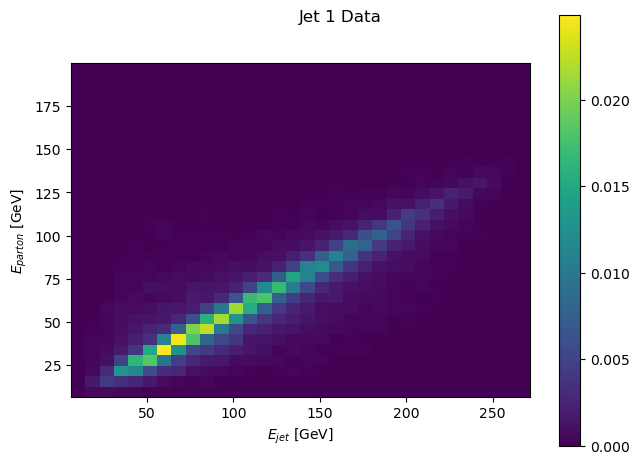

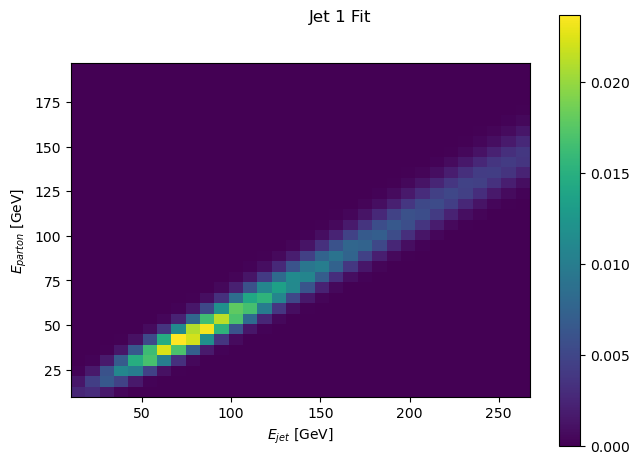

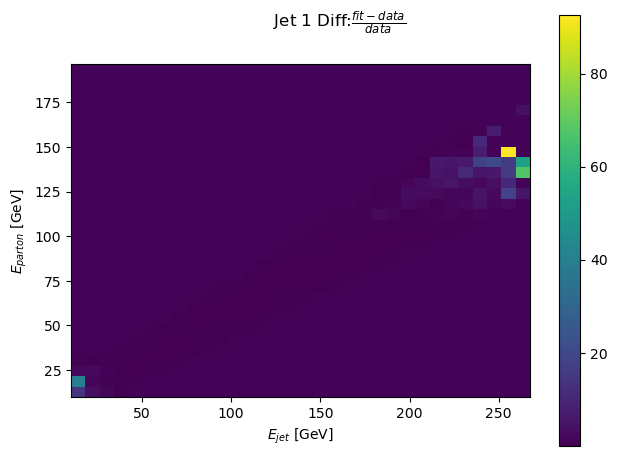

In [12]:
res1 = fit_jet_binned(data["reco"], 1, n_iters = 1)
good1 = res1.x.copy()

Optimization terminated successfully.
         Current function value: 0.000734
         Iterations: 1441
         Function evaluations: 2107


C:\Users\Bryan Bliewert\AppData\Local\Temp\ipykernel_4988\1326134499.py:101: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  c_result = minimize(f_binned, x0=make_guess(), method='Nelder-Mead', options={'maxiter': 1e4, 'maxfev': 1e4, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.002472
         Iterations: 1297
         Function evaluations: 1949
Optimization terminated successfully.
         Current function value: 0.002345
         Iterations: 2241
         Function evaluations: 3620
Optimization terminated successfully.
         Current function value: 0.003506
         Iterations: 2168
         Function evaluations: 3242
Optimization terminated successfully.
         Current function value: 0.001841
         Iterations: 2393
         Function evaluations: 3820
Optimization terminated successfully.
         Current function value: 0.001907
         Iterations: 2290
         Function evaluations: 3373
Optimization terminated successfully.
         Current function value: 0.001146
         Iterations: 1589
         Function evaluations: 2340
Optimization terminated successfully.
         Current function value: 0.002340
         Iterations: 2409
         Function evaluations: 3483


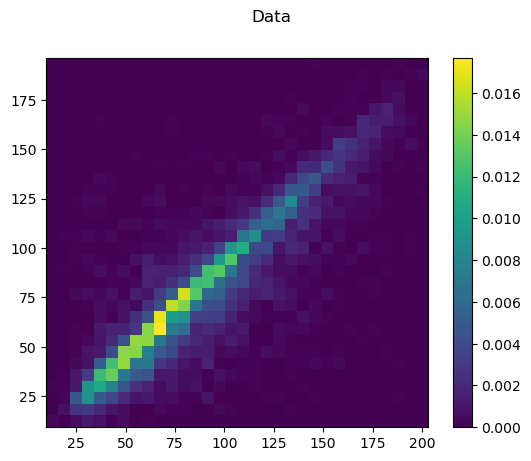

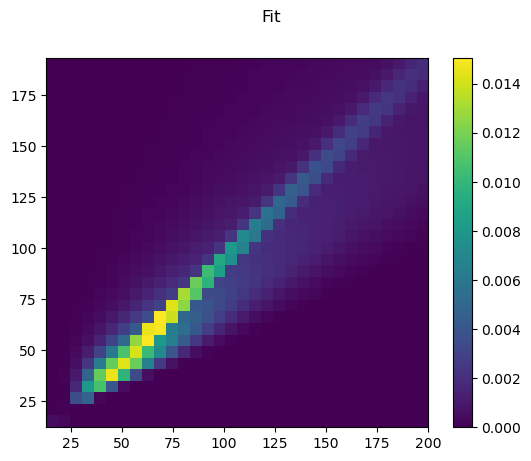

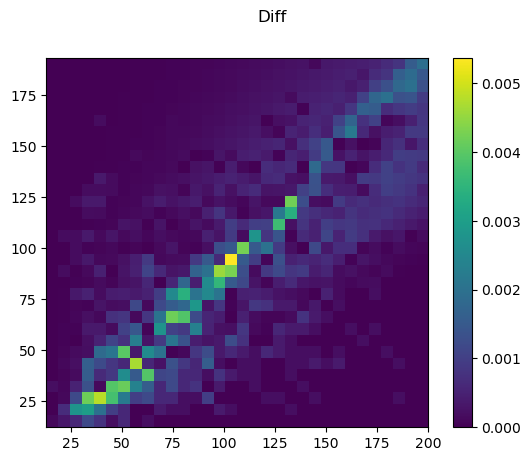

In [534]:
res2 = fit_jet_binned(data, 2)
good2 = res2.x.copy()

Optimization terminated successfully.
         Current function value: 0.000812
         Iterations: 4281
         Function evaluations: 6481
Optimization terminated successfully.
         Current function value: 0.002076
         Iterations: 2484
         Function evaluations: 3672


C:\Users\Bryan Bliewert\AppData\Local\Temp\ipykernel_4988\1326134499.py:101: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  c_result = minimize(f_binned, x0=make_guess(), method='Nelder-Mead', options={'maxiter': 1e4, 'maxfev': 1e4, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.000895
         Iterations: 1534
         Function evaluations: 2285
Optimization terminated successfully.
         Current function value: 0.000797
         Iterations: 1905
         Function evaluations: 2841
Optimization terminated successfully.
         Current function value: 0.002778
         Iterations: 2761
         Function evaluations: 4058
Optimization terminated successfully.
         Current function value: 0.001379
         Iterations: 3878
         Function evaluations: 5630
Optimization terminated successfully.
         Current function value: 0.003104
         Iterations: 1861
         Function evaluations: 2673
Optimization terminated successfully.
         Current function value: 0.001520
         Iterations: 3067
         Function evaluations: 4502


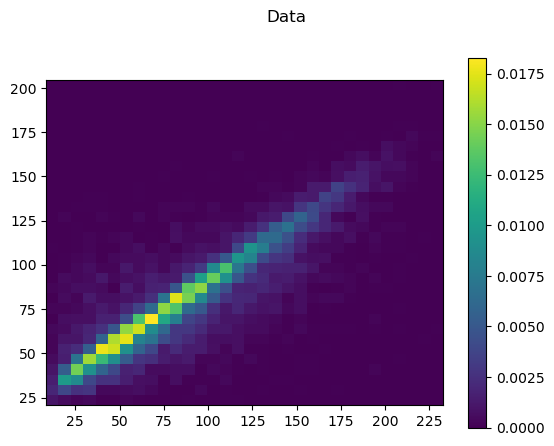

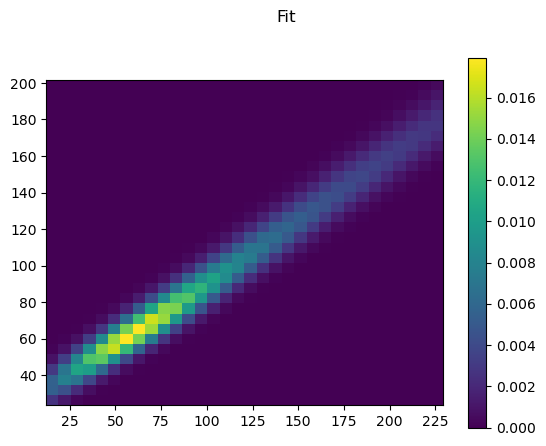

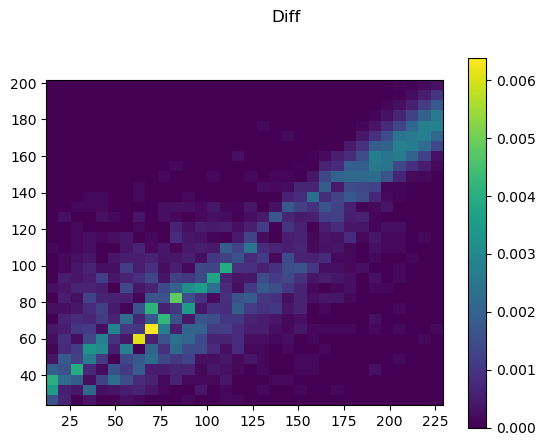

In [537]:
res3 = fit_jet_binned(data, 3)
good3 = res3.x.copy()

Optimization terminated successfully.
         Current function value: 0.001962
         Iterations: 1592
         Function evaluations: 2350


C:\Users\Bryan Bliewert\AppData\Local\Temp\ipykernel_4988\1326134499.py:101: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  c_result = minimize(f_binned, x0=make_guess(), method='Nelder-Mead', options={'maxiter': 1e4, 'maxfev': 1e4, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.000823
         Iterations: 2877
         Function evaluations: 4139
Optimization terminated successfully.
         Current function value: 0.001577
         Iterations: 1403
         Function evaluations: 2130
Optimization terminated successfully.
         Current function value: 0.001785
         Iterations: 2389
         Function evaluations: 3829
Optimization terminated successfully.
         Current function value: 0.001455
         Iterations: 1791
         Function evaluations: 2639
Optimization terminated successfully.
         Current function value: 0.001230
         Iterations: 4989
         Function evaluations: 7162
Optimization terminated successfully.
         Current function value: 0.000861
         Iterations: 2679
         Function evaluations: 3931
Optimization terminated successfully.
         Current function value: 0.001986
         Iterations: 2230
         Function evaluations: 3632


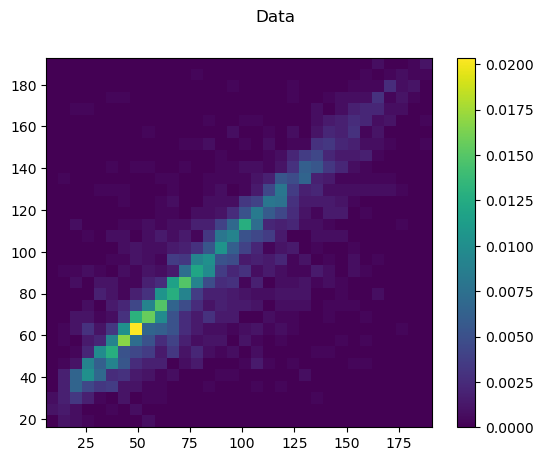

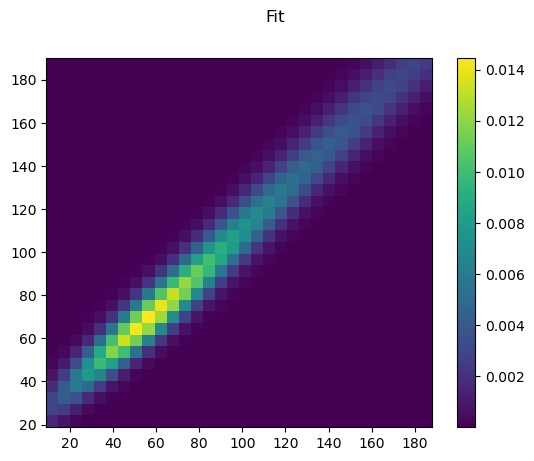

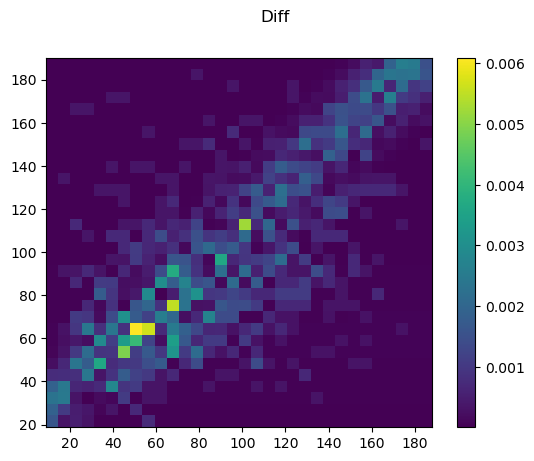

In [538]:
res4 = fit_jet_binned(data, 4)
good4 = res4.x.copy()

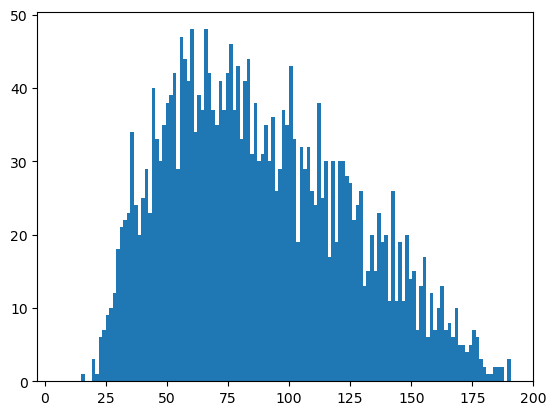

In [116]:
bin_count_p, bin_borders_p, _ = plt.hist(reco["parton1_e"], bins=bin_borders_j)

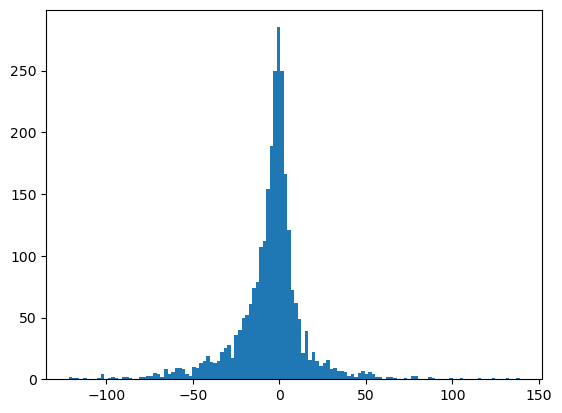

In [98]:
bin_count, bin_borders, _ = plt.hist(reco["jet1_e"] - reco["parton1_e"], bins=bin_borders_j)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2


In [ ]:
popt, _ = curve_fit(dbgauss_wrapped, (E_j, E_p), , p0=[])